In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
dataset = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX11.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:68])
X[:, 1:68] = imputer.transform(X[:, 1:68])
print(X)

[[5.50540000e+04 1.09000000e+02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.50550000e+04 5.20000000e+01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.62360000e+04 3.40000000e+01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.41800000e+03 3.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.41600000e+03 3.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.42000000e+03 3.00000000e+00 2.00000000e+00 ... 1.46049687e+05
  3.23091692e+06 2.96867375e+06]]


In [3]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[0 0 0 ... 0 0 1]
[[3.26800000e+03 1.19368587e+08 4.00000000e+01 ... 3.63938670e+06
  1.64000000e+07 6.52974800e+06]
 [8.00000000e+01 5.96730400e+06 3.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.30000000e+01 1.82153000e+05 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.30000000e+01 5.84780000e+04 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.43000000e+02 5.60201500e+06 7.00000000e+00 ... 0.00000000e+00
  5.29530300e+06 5.29530300e+06]
 [4.43000000e+02 6.12112760e+07 1.70000000e+01 ... 2.84407072e+05
  1.02000000e+07 9.45576900e+06]]
[0 0 0 ... 0 0 0]
[[5.30000000e+01 1.45300000e+05 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.23920000e+04 2.38930000e+04 2.90000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.55940000e+04 2.08300000e+03 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.00000000e+01 4.60890390e+07 8.00000000e+00 ... 1.53224723e

In [4]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.19650596  3.73862704  1.00499158 ...  1.89931026  1.09678154
   0.30968102]
 [-0.38454949 -0.15747867 -0.13901976 ... -0.08312421 -0.27236187
  -0.26173881]
 [-0.38614208 -0.35623797 -0.16993899 ... -0.08312421 -0.27236187
  -0.26173881]
 ...
 [-0.38614208 -0.36048705 -0.20085821 ... -0.08312421 -0.27236187
  -0.26173881]
 [-0.36313801 -0.17002884 -0.01534286 ... -0.08312421  0.16971308
   0.20165444]
 [-0.36313801  1.74052767  0.29384939 ...  0.07179705  0.57917854
   0.56573782]]
[[-0.38614208 -0.35750413 -0.16993899 ... -0.08312421 -0.27236187
  -0.26173881]
 [ 2.11121522 -0.36167528  0.6648801  ... -0.08312421 -0.27236187
  -0.26173881]
 [ 2.8899325  -0.3624246  -0.16993899 ... -0.08312421 -0.27236187
  -0.26173881]
 ...
 [-0.38454949  1.22097593  0.01557637 ... -0.07477781  0.56248167
   0.61336361]
 [-0.38614208 -0.36249033 -0.16993899 ... -0.08312421 -0.27236187
  -0.26173881]
 [-0.38614208 -0.36040968 -0.16993899 ... -0.08312421 -0.27236187
  -0.26173881]]


In [5]:
# Determining the number of components for LDA
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))
n_components = min(num_features, num_classes - 1)

# Applying LDA
lda = LDA(n_components=n_components)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [6]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

[[3609]]
Accuracy: 1.0


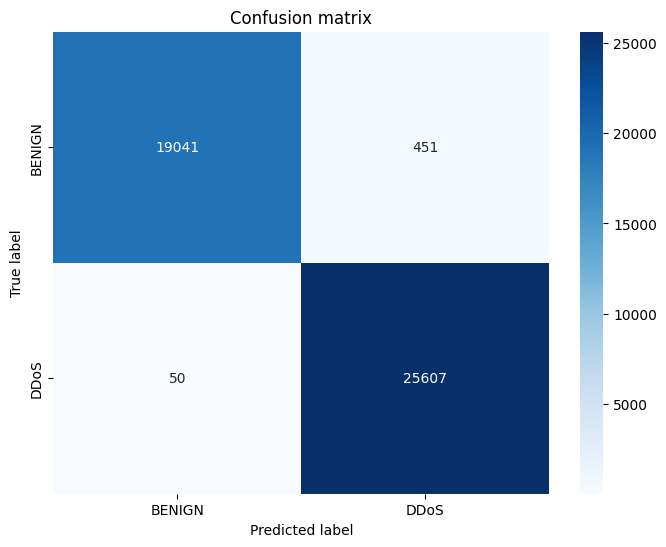

<ipython-input-5-3338b28995cc>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=np.zeros((sum(y == cl), 1)),
<ipython-input-5-3338b28995cc>:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=np.zeros((sum(y == cl), 1)),


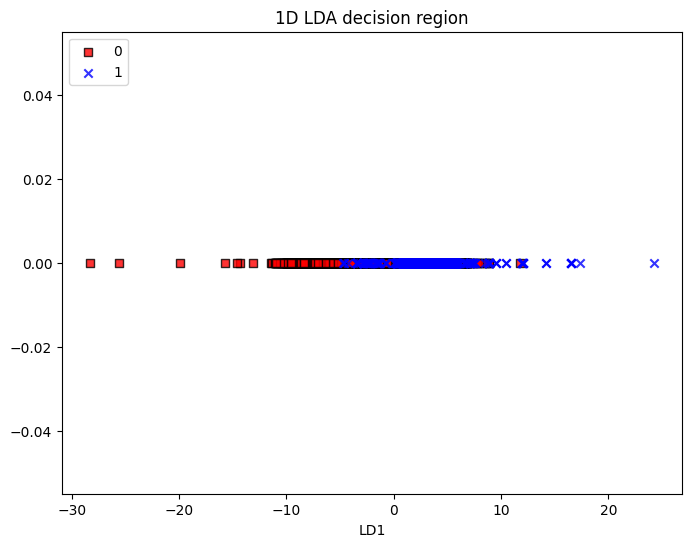

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting the confusion matrix
plot_confusion_matrix(cm, classes=le.classes_)

# Function to visualize the decision boundary for 1 or 2 dimensions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    if X.shape[1] == 1:
        plt.figure(figsize=(8, 6))
        # Scatter plot for 1D LDA output
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=np.zeros((sum(y == cl), 1)),
                        alpha=0.8, c=cmap(idx),
                        marker=markers[idx], label=cl, edgecolor='black')
        plt.title('1D LDA decision region')
        plt.xlabel('LD1')
        plt.legend(loc='upper left')
        plt.show()
    elif X.shape[1] == 2:
        # Plotting the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # Plotting all samples
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, c=cmap(idx),
                        marker=markers[idx], label=cl, edgecolor='black')

        plt.xlabel('LD1')
        plt.ylabel('LD2')
        plt.legend(loc='upper left')
        plt.show()
    else:
        print("The number of dimensions is not supported for visualization.")

# Determine the number of components for visualization
if X_train.shape[1] > 2:
    lda_vis = LDA(n_components=2)
    X_train_vis = lda_vis.fit_transform(X_train, y_train)
    X_test_vis = lda_vis.transform(X_test)
else:
    X_train_vis = X_train
    X_test_vis = X_test

# Combine train and test data for visualization
X_combined = np.vstack((X_train_vis, X_test_vis))
y_combined = np.hstack((y_train, y_test))

# Plot decision regions
plot_decision_regions(X_combined, y_combined, classifier=classifier)
